# Izgi Kocacelebi

## The relationship between shipping type and the amount of sales.I am interested in exploring whether people who spend more money on this superstore prefer first class shipping or not.e.

In [5]:
import pandas as pd
data_raw = pd.read_csv("../../train.csv")

In [6]:
data_raw

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### Milestone 3

In [7]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#### EDA

In [8]:
data_raw.shape

(9800, 18)

In [9]:
data_raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
data_raw.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [11]:
data_raw.nunique(axis=0)

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [12]:
data_raw.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


I started to clean up the data for my research purposes.

In [13]:
df = data_raw.drop(['Row ID','Ship Date','Country','Postal Code','City','Product ID','Product Name', 'Region'],axis = 1).reset_index(drop = True)
df

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,State,Category,Sub-Category,Sales
0,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,California,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,Illinois,Office Supplies,Binders,3.7980
9796,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Office Supplies,Art,10.3680
9797,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Technology,Phones,235.1880
9798,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Technology,Phones,26.3760


In [14]:
print(df.columns)
NA_values = df.isna().sum()

def na_filter(df,na,treshold = 0.4):
    for i in na.keys():
        if na[i]/df.shape[0] > treshold:
            df.drop(i,axis = 1)

na_filter(df,NA_values)
df.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'State', 'Category', 'Sub-Category', 'Sales'],
      dtype='object')


Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'State', 'Category', 'Sub-Category', 'Sales'],
      dtype='object')

In [15]:
df = df.dropna(axis=0)
df.shape

(9800, 10)

In [16]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df


,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,State,Category,Sub-Category,Sales
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,California,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,Furniture,Tables,957.5775
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,Standard Class,SH-19975,Sally Hughsby,Corporate,Illinois,Office Supplies,Binders,3.7980
9796,CA-2016-128608,2016-12-01,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Office Supplies,Art,10.3680
9797,CA-2016-128608,2016-12-01,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Technology,Phones,235.1880
9798,CA-2016-128608,2016-12-01,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Technology,Phones,26.3760


<AxesSubplot:>

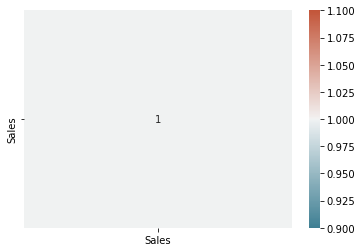

In [17]:
correlation = df.corr()
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True, cmap = sns.diverging_palette(220,20,as_cmap = True))

Since Sales is the only column that stores numerical data, it is not possible to plot a heatmap because there are no variables that it can demonstrate correlation.

In [18]:
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year

<AxesSubplot:xlabel='Month', ylabel='Sales'>

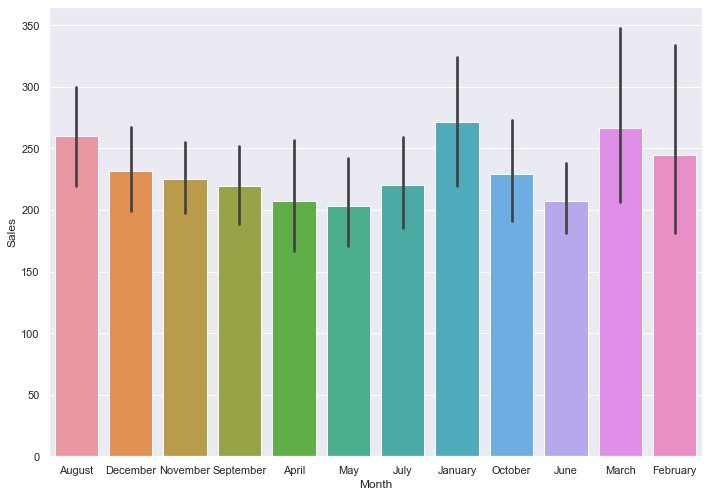

In [19]:
sns.set(rc= {'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Month', y = 'Sales',data = df)

### Method Chains

In [20]:
import project_functions2

df_cleaned = project_functions2.load_and_process("../../train.csv")
df_cleaned


,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,State,Category,Sub-Category,Sales,Month,Year
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,Furniture,Bookcases,261.9600,August,2017
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,Furniture,Chairs,731.9400,August,2017
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,California,Office Supplies,Labels,14.6200,December,2017
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,Furniture,Tables,957.5775,November,2016
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,Office Supplies,Storage,22.3680,November,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,Standard Class,SH-19975,Sally Hughsby,Corporate,Illinois,Office Supplies,Binders,3.7980,May,2017
9796,CA-2016-128608,2016-12-01,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Office Supplies,Art,10.3680,December,2016
9797,CA-2016-128608,2016-12-01,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Technology,Phones,235.1880,December,2016
9798,CA-2016-128608,2016-12-01,Standard Class,CS-12490,Cindy Schnelling,Corporate,Ohio,Technology,Phones,26.3760,December,2016


### Analysis

In [21]:
df['Ship Mode'].value_counts(normalize = True)

Standard Class    0.597857
Second Class      0.194082
First Class       0.153163
Same Day          0.054898
Name: Ship Mode, dtype: float64

In [22]:
counts = np.array ([0.597836,0.194141,0.153108,0.054915])
l = ['Standard Class','Second Class','First Class','Same Day']

([<matplotlib.patches.Wedge at 0x7f9b9cc62be0>,
 [Text(-0.3327987157055502, 1.0484488613302685, 'Standard Class'),
  Text(-0.3732195530443238, -1.0347498080335147, 'Second Class'),
  Text(0.7455687227821352, -0.8087813546373432, 'First Class'),
  Text(1.083670744647477, -0.18883251095927014, 'Same Day')])

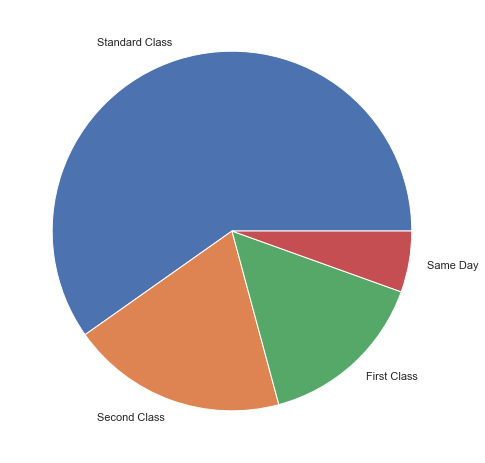

In [23]:
plt.pie(counts, labels = l)

In [24]:
df.groupby('Ship Mode').agg({'Sales' : np.mean}).sort_values(by = 'Sales',ascending = False)

,Sales
Ship Mode,
Second Class,236.547939
Same Day,232.749143
First Class,230.228020
Standard Class,228.849856


From the table above, it can be concluded that customers usually upgrade their shipping method, the more they spend.

In [25]:
sale_ship = df.groupby('Ship Mode').agg({'Sales' : np.mean}).sort_values(by = 'Sales')

<AxesSubplot:xlabel='Ship Mode'>

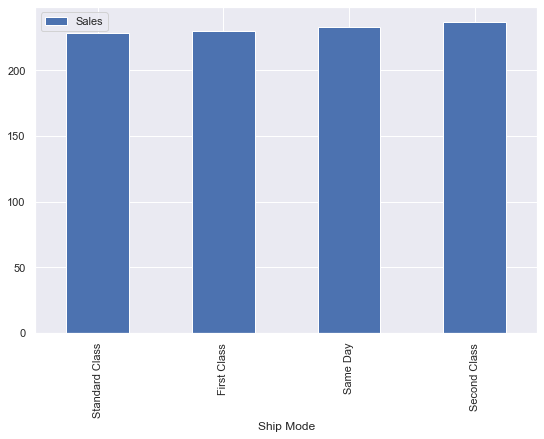

In [26]:
sale_ship.plot.bar(figsize=(9,6))

<AxesSubplot:xlabel='Year', ylabel='Sales'>

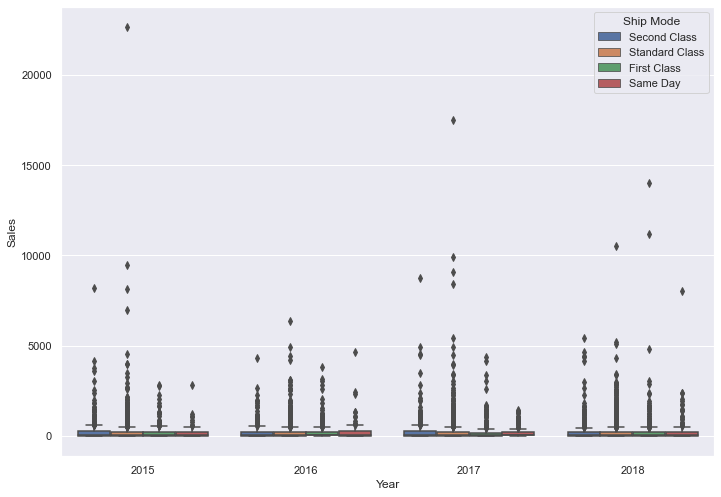

In [27]:
sns.boxplot(x='Year', y = 'Sales',data = df, hue = 'Ship Mode')

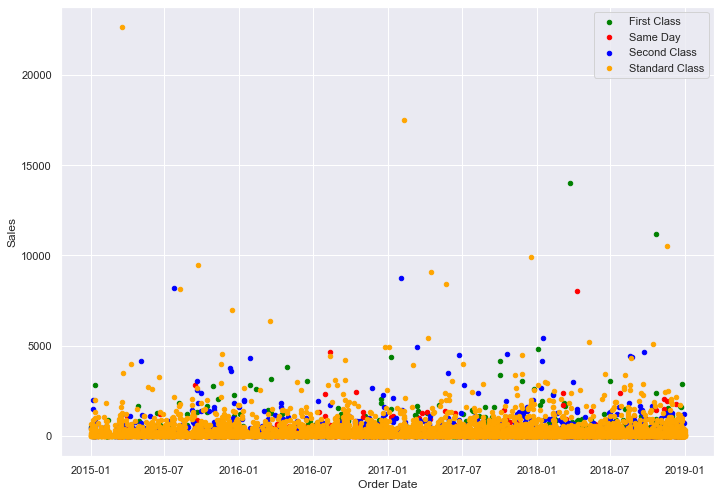

In [30]:
fig, ax = plt.subplots()
colors = {'Standard Class' : 'orange', 'Second Class' : 'blue', 'First Class' : 'green', 'Same Day' : 'red'}
grouped = df.groupby('Ship Mode')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Order Date', y='Sales', label=key, color=colors[key])

plt.show()

From this graph, it is difficult to tell the relationship between Sales and Ship Mode. It can be concluded that same day shipping is not preferred and if the customers spend more than USD 5000 on the Superstore, they prefer Second class over First Class. 